# Práctica 5: Regresion lineal regularizada. Sesgo y varianza

Alumnos: Andrés Ruiz Bartolomé y Adrián de Lucas Gómez  

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

# Parte 1: Función de coste

En esta primera parte queremos comprobar como afecta a las predicciones el sesgo y la varianza.
Para ello haremos regresion lineal usando el **lRate** (un valor de lambda) que mas se ajusta a los ejemplos de entrenamiento y por lo tanto mas sesgado.

In [17]:
def Hypothesys(X, theta):
    return X.dot(theta)


def Cost(theta, X, y, lRate):
    return ((Hypothesys(X, theta) - y.ravel()).dot(Hypothesys(X, theta) - y.ravel())/(len(y)*2)
            + lRate/(2*len(y))*(np.square(theta[1:])).sum())


def Gradiente(theta, X, Y, lRate):
    stacked = np.hstack(([0], theta[1:]))
    op1 = X.T.dot(Hypothesys(X, theta) - Y.ravel())
    op2 = len(Y) + lRate * stacked/len(Y)
    return (op1 / op2)

Coste con λ=1 y θ=[1; 1]:  303.9931922202643
Gradiente entre  -15.303015674201186  y  594.0421183508228


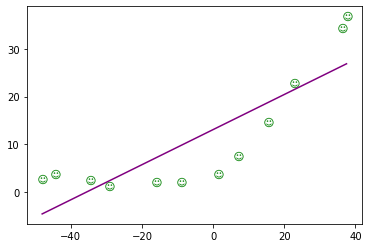

In [18]:

data = loadmat('ex5data1.mat')
# data.keys()
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']
lRate = 1
theta = np.array([1, 1]).ravel()
Xstacked = np.c_[np.ones((len(X), 1)), X]
c = Cost(theta, Xstacked, y, lRate)
print("Coste con λ=1 y θ=[1; 1]: ", c)
g = Gradiente(theta, Xstacked, y, lRate)
print("Gradiente entre ", min(g), " y ", max(g))

lRate = 0
minFun = minimize(fun=Cost, x0=theta, args=(Xstacked, y, lRate))

plt.figure()
plt.scatter(X, y, marker = '$☺$', c="green", s = 100, linewidths=0.1)
lineX = np.linspace(min(X), max(X), 1000)
lineY = np.c_[np.ones((1000,1)), lineX].dot(minFun.x)
plt.plot(lineX, lineY, '-', c="purple")
plt.show()


# Parte 2: Curvas de aprendizaje



En esta parte el objetivo es el de ver como va cambiando el valor del coste según se van probando mas casos y vemos la evolucion del error. Para ello usamos el método **CalculaError** y lo aplicaremos sobre el conjunto de entrenamiento  y en el de validación.
Se aprecia que como estaba muy sesgada a los datos de entrenamiento cuando calculamos el error con los de validación tenemos un valor muy grande de error con los primeros ejemplos al estar sobreajustado a los otros.

Rojo: error con ejemplos de entrenamiento.

Verde: error con ejemplos de validacion.

In [19]:

def CalculaError(theta, X, Y):
    op1 = (Hypothesys(X, theta) - Y.ravel())
    op2 = op1.dot(Hypothesys(X, theta) - Y.ravel())
    return op2 / (len(Y) * 2)


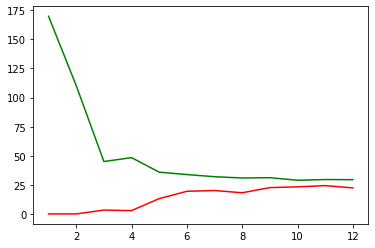

In [20]:
 # Parte2

data = loadmat('ex5data1.mat')
# data.keys()
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']
lRate = 1
theta = np.array([1, 1]).ravel()
Xstacked = np.c_[np.ones((len(X), 1)), X]

m = len(y)
errorEntre = np.empty(m)
errorValida = np.empty(m)

Xvalidar = np.c_[np.ones((len(Xval), 1)), Xval]
theta = np.array([1, 1])
lRate = 0

for i in range(1, m+1):
    fmin = minimize(fun=Cost, x0=theta, args=(Xstacked[:i], y[:i], lRate))
    errorEntre[i-1] = CalculaError(fmin.x, Xstacked[:i], y[:i])
    errorValida[i-1] = CalculaError(fmin.x, Xvalidar, yval)

plt.figure()
plt.plot(range(1, m+1), errorEntre, c = "red")
plt.plot(range(1, m+1), errorValida, c = "green")
plt.show()

# Parte 3: Regresion polinomial

Ahora el objetivo que tenemos es el de tratar de ajustarnos mas a los valores de la funcion (reduciendo el sobreajuste) por lo que tenemos que utilizar polinomios de mayor grado. Los generaremos con la funcion **genPolynomial**. Tambien deberemos de normalizar los datos para que los cálculos sean mas precisos y lo haremos con la funcion **normalizar** la cual dado una media de los valores y sigma te devuelve los valores ya normalizados.

In [21]:

def genPolynomial(X, p):
    ret = np.empty([np.shape(X)[0], p])
    for i in range(p):
        ret[:, i] = (X**(i+1)).ravel()
    return ret


def normalizar(X, media, sigma):
    return ((X-media)/sigma)


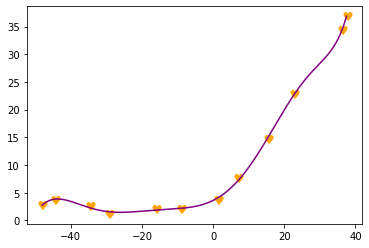

In [22]:

# PARTE 3
data = loadmat('ex5data1.mat')
# data.keys()
X, y = data['X'], data['y']

gradoPolinomio = 8
xPolinomial = genPolynomial(X, gradoPolinomio)
mediaX = np.mean(xPolinomial, axis=0)
sigmaX = np.std(xPolinomial, axis=0)
Xnorm = normalizar(xPolinomial, mediaX, sigmaX)
Xnorm = np.c_[np.ones((len(Xnorm), 1)), Xnorm]
lRate = 0
theta = np.zeros(gradoPolinomio + 1)

fmin = minimize(fun=Cost, x0=theta, args=(Xnorm, y, lRate))

plt.figure()
plt.scatter(X, y, marker = '$♥$', c="orange", s = 100, linewidths=0.1)
graphX = (np.arange(min(X), max(X), 0.05))
auxX = normalizar(genPolynomial(graphX, gradoPolinomio), mediaX, sigmaX)
graphY = np.c_[np.ones((len(auxX), 1)), auxX].dot(fmin.x)

plt.plot(graphX, graphY, '-', c= "purple")
plt.show()

# Parte 3.1: Curva de aprendizaje usando la curva polinomial

Como en el apartado 2 volveremos a ver la evolución de los errores de las predicciones sobre los ejemplos de entrenamiento y de validación.
La gráfica muestra los errorres con un **lRate** sobre los conjuntos.

Morado: error con ejemplos de entrenamiento con función polinómica.

Amarillo: error con ejemplos de validación con función polinómica.

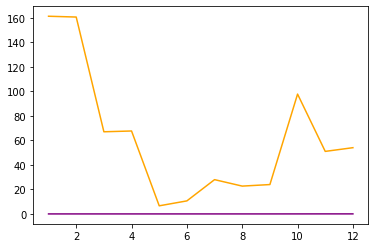

In [23]:
# curva para la hipotesis polinomial

m = len(y)
errorEntre = np.empty(m)
errorValida = np.empty(m)

Xvalidar = normalizar(genPolynomial(Xval, gradoPolinomio), mediaX, sigmaX)
XvalidarStacked = np.c_[np.ones((len(Xvalidar), 1)), Xvalidar]
theta = np.zeros(gradoPolinomio+1)
lRate = 0

for i in range(1, m+1):
    fmin = minimize(fun=Cost, x0=theta, args=(Xnorm[:i], y[:i], lRate))
    errorEntre[i-1] = CalculaError(fmin.x, Xnorm[:i], y[:i])
    errorValida[i-1] = CalculaError(fmin.x, XvalidarStacked, yval)

plt.figure()
plt.plot(range(1, m+1), errorEntre, c="purple")
plt.plot(range(1, m+1), errorValida, c="orange")
plt.show()

# Parte 4: Seleccion del parámetro lambda

Ahora el objetivo es ver el mejor valor para la función **minimize**. Antes usabamos el **lRate** pero ahora comprobaremos con distintos valores de lambda para ver cual es el que minimiza el coste. 

Amarillo: error con ejemplos de entrenamiento.

Azul: error con ejemplos de validacion.

Fijándonos en la grafica que es el valor de **lambda=3** el que saca un coste mas bajo en los ejemplos de validación.

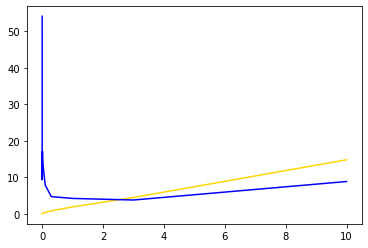

In [24]:

# PARTE 4 Seleccion de la labmda

lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
nLambdas = len(lambdas)
errorEntre = np.empty(nLambdas)
errorValida = np.empty(nLambdas)

Xvalidar = normalizar(genPolynomial(Xval, gradoPolinomio), mediaX, sigmaX)
XvalidarStacked = np.c_[np.ones((len(Xvalidar), 1)), Xvalidar]
theta = np.zeros(gradoPolinomio+1)

i = 0
for lambo in lambdas:
    fmin = minimize(fun=Cost, x0=theta, args=(Xnorm, y, lambo))
    errorEntre[i] = CalculaError(fmin.x, Xnorm, y)
    errorValida[i] = CalculaError(fmin.x, XvalidarStacked, yval)
    i += 1

plt.figure()
plt.plot(lambdas, errorEntre, c = "gold")
plt.plot(lambdas, errorValida, c = "blue")
plt.show()



# Parte 4.1: Minimizacion del error en funcion del lambda

Podremos comprobar el valor de diferentes valores de lambda y como afectan al valor de los errores de la hipotesis pero usando el 3er subconjunto de los ejemplos de entrenamiento, los de **test**. Podemos ver que lambda=3 da un valor de error de 3.572

In [25]:

#Parte 5 error para cierta lambda

lambo = 3
XtestNorm = normalizar(genPolynomial(Xtest, gradoPolinomio), mediaX, sigmaX)
XtestStacked = np.c_[np.ones((len(XtestNorm), 1)), XtestNorm]
theta = np.zeros(gradoPolinomio+1)

fmin = minimize(fun = Cost, x0= theta, args=(Xnorm, y, lambo))
errorTest = CalculaError(fmin.x, XtestStacked, ytest)

print("El error obtenido con labda {} es: {}".format(lambo , errorTest))


El error obtenido con labda 3 es: 3.5720264095176373
